In [ ]:
# Los cluster jerárquicos son grupos de datos que estan "proximos"
#Los cluster tienen su metodo de distancia 
#Un dendrograma es un diagrama que muestra las distancias de atributos entre cada par de clases fusionadas de manera secuencial

In [3]:
import numpy as np # Calculos avanzados
import pandas as pd #Funciones utiles para el analisis de datos
import matplotlib.pyplot as plt #Crea graficos

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline


In [4]:
estudiantes = pd.read_csv("../arch/Estudiantes.csv", engine="python", index_col=0) #Index_col=0 indica que las filas tienen nombre
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes
Estudiante,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7


In [5]:
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes
Estudiante,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7


In [6]:
#La funcion iloc[] Nos muestra información de la variable, si hay un solo parametro hace referencia a las filas.
#Si hay 2 parametros el primero hace referencia a las filas y el segundo hace referencia a la columnas.
# .values nos da solo los valores
notas = estudiantes.iloc[:,[0,1,2,3,4,]].values
notas

array([[7. , 6.5, 9.2, 8.6, 8. ],
       [7.5, 9.4, 7.3, 7. , 7. ],
       [7.6, 9.2, 8. , 8. , 7.5],
       [5. , 6.5, 6.5, 7. , 9. ],
       [6. , 6. , 7.8, 8.9, 7.3],
       [7.8, 9.6, 7.7, 8. , 6.5],
       [6.3, 6.4, 8.2, 9. , 7.2],
       [7.9, 9.7, 7.5, 8. , 6. ],
       [6. , 6. , 6.5, 5.5, 8.7],
       [6.8, 7.2, 8.7, 9. , 7. ]])

### Creando el dendrograma del Clustering jerárquico

In [7]:
# linkage agrupa a los individuos en base a su similitud, en este caso las notas
# El metodoWard agrupa a los clusters
Clustering_Jerarquico = linkage(notas, "ward")
Clustering_Jerarquico

array([[ 5.        ,  7.        ,  0.55677644,  2.        ],
       [ 4.        ,  6.        ,  0.65574385,  2.        ],
       [ 1.        ,  2.        ,  1.33790882,  2.        ],
       [ 0.        ,  9.        ,  1.39283883,  2.        ],
       [10.        , 12.        ,  1.71172428,  4.        ],
       [ 3.        ,  8.        ,  1.89472953,  2.        ],
       [11.        , 13.        ,  1.98620241,  4.        ],
       [15.        , 16.        ,  6.13038879,  6.        ],
       [14.        , 17.        ,  7.86837552, 10.        ]])

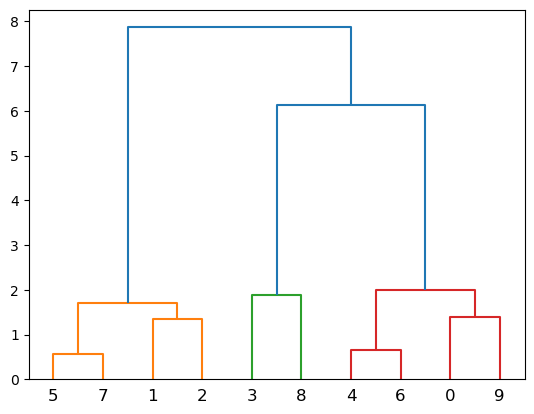

In [8]:
dendogram = sch.dendrogram(Clustering_Jerarquico)

In [9]:
clusters = fcluster(Clustering_Jerarquico, t=7, criterion="distance") #t es la altura a la que haremos el corte del dendrograma
clusters

array([2, 1, 1, 2, 2, 1, 2, 1, 2, 2], dtype=int32)

In [10]:
clusters = fcluster(Clustering_Jerarquico, t=2, criterion="distance") #t es la altura a la que haremos el corte del dendrograma
clusters

array([3, 1, 1, 2, 3, 1, 3, 1, 2, 3], dtype=int32)

In [11]:
#Agrego una columna a estudiantes
estudiantes["Clustering.Jer"] = clusters
#Para eliminar una columna -->> estudiantes = estudiantes.drop(columns = ["Clustering Jerarquico"]) 
estudiantes

,Matematicas,Ciencias,Espanol,Historia,Deportes,Clustering.Jer
Estudiante,,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0,3
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Luis,5.0,6.5,6.5,7.0,9.0,2
Andres,6.0,6.0,7.8,8.9,7.3,3
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,3
Jose,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,2


In [12]:
#Para Pasarlo a un archivo
estudiantes.to_csv("../arch/Estudiantes Clustering Jerarquico.csv")

OSError: Cannot save file into a non-existent directory: 'arch'